In [1]:
import torch.nn as nn
from torch.optim import lr_scheduler
import torch
import numpy as np

In [2]:

from cifar_dl_dt_helper import get_dataloaders_sizes_classes
from CifarModel1 import Cifar_model1
from pytorch_training2 import Pytorch_training_helper

In [3]:
from pytorch_model_helper import get_parameters_to_vectors,new_theta,get_best_model_details_after_training

In [4]:
data_dir = './data/cifar10'
# result_folder = "reek_lr_alpha/"

In [5]:
lrs = [1e-1,1e-2,1e-3,1e-4,1e-5]
lrs

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [6]:
# batch_size=512

In [7]:
cifar_model = {}
grad_norm_per_epoch ={}
train_losses ={}
val_losses = {}
train_acc = {}
val_acc ={}
model_wts_epoch={}
sensitivity ={}
optimizer ={}
exp_lr_scheduler = {}
result_folder = "lrs_based_problem_final_eps_25/"

batch_size = 512
num_epochs=25

dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,batch_size)
py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,batch_size,result_folder,
                                          flag_grad=1,
                                          flag_weights=1,
                                          flag_frobenius_norm=1)

gamma_lr_scheduler1 = 0.1
criterion1 = nn.CrossEntropyLoss()
weight_decay1 = 1e-4
lrs = [1e-1,1e-2,1e-3,1e-4,1e-5]

best_model_train_loss =[]
best_model_test_loss =[]

best_model_train_acc =[]
best_model_test_acc =[]

best_model_sensitivity = []


for step1 in lrs:
    cifar_model[step1]= Cifar_model1()
    
    optimizer[step1] = torch.optim.Adam(cifar_model[step1].parameters(),lr = step1,weight_decay=weight_decay1)

    exp_lr_scheduler[step1] = lr_scheduler.StepLR(
        optimizer[step1], step_size=10, gamma=gamma_lr_scheduler1
    )
    
    cifar_model[step1],grad_norm_per_epoch[step1],train_losses[step1],val_losses[step1],train_acc[step1],val_acc[step1],model_wts_epoch[step1],sensitivity[step1] = py_train_helper.train_model(cifar_model[step1],criterion1,optimizer[step1],exp_lr_scheduler[step1],"lrs_"+str(step1)+"_model_",num_epochs=num_epochs)
    grad_norm,train_loss,val_loss,tr_acc,vl_acc,mdl_wts_eph,sensi = get_best_model_details_after_training(grad_norm_per_epoch[step1],train_losses[step1],val_losses[step1],train_acc[step1],val_acc[step1],model_wts_epoch[step1],sensitivity[step1] )
    
    best_model_train_loss.append(train_loss)
    best_model_test_loss.append(val_loss)

    best_model_train_acc.append(tr_acc)
    best_model_test_acc.append(vl_acc)
    
    best_model_sensitivity.append(sensi)
    

Training started:
Phase: train Epoch: 1/25 Loss: 2.3609 Acc: 0.0996        
Phase: validation   Epoch: 1/25 Loss: 2.3612 Acc: 0.1000        
Phase: train Epoch: 2/25 Loss: 2.3620 Acc: 0.0991        
Phase: validation   Epoch: 2/25 Loss: 2.3632 Acc: 0.0979        
Phase: train Epoch: 3/25 Loss: 2.3612 Acc: 0.1000        
Phase: validation   Epoch: 3/25 Loss: 2.3612 Acc: 0.1000        
Phase: train Epoch: 4/25 Loss: 2.3590 Acc: 0.1021        
Phase: validation   Epoch: 4/25 Loss: 2.3612 Acc: 0.1000        
Phase: train Epoch: 5/25 Loss: 2.3593 Acc: 0.1019        
Phase: validation   Epoch: 5/25 Loss: 2.3539 Acc: 0.1072        
Phase: train Epoch: 6/25 Loss: 2.3609 Acc: 0.1002        
Phase: validation   Epoch: 6/25 Loss: 2.3612 Acc: 0.1000        
Phase: train Epoch: 7/25 Loss: 2.3612 Acc: 0.0999        
Phase: validation   Epoch: 7/25 Loss: 2.3950 Acc: 0.0661        
Phase: train Epoch: 8/25 Loss: 2.3678 Acc: 0.0934        
Phase: validation   Epoch: 8/25 Loss: 2.3611 Acc: 0.1000       

Phase: train Epoch: 15/25 Loss: 1.9101 Acc: 0.5584        
Phase: validation   Epoch: 15/25 Loss: 1.8739 Acc: 0.5955        
Phase: train Epoch: 16/25 Loss: 1.9100 Acc: 0.5591        
Phase: validation   Epoch: 16/25 Loss: 1.8739 Acc: 0.5953        
Phase: train Epoch: 17/25 Loss: 1.9095 Acc: 0.5581        
Phase: validation   Epoch: 17/25 Loss: 1.8726 Acc: 0.5976        
Phase: train Epoch: 18/25 Loss: 1.9059 Acc: 0.5612        
Phase: validation   Epoch: 18/25 Loss: 1.8723 Acc: 0.5964        
Phase: train Epoch: 19/25 Loss: 1.9074 Acc: 0.5604        
Phase: validation   Epoch: 19/25 Loss: 1.8720 Acc: 0.5974        
Phase: train Epoch: 20/25 Loss: 1.9056 Acc: 0.5634        
Phase: validation   Epoch: 20/25 Loss: 1.8715 Acc: 0.5972        
Phase: train Epoch: 21/25 Loss: 1.9060 Acc: 0.5632        
Phase: validation   Epoch: 21/25 Loss: 1.8709 Acc: 0.5971        
Phase: train Epoch: 22/25 Loss: 1.9060 Acc: 0.5625        
Phase: validation   Epoch: 22/25 Loss: 1.8708 Acc: 0.5972        


In [8]:
grad_norm_per_epoch

{0.1: {0: 0.0,
  1: 0.2834253727591285,
  2: 0.0,
  3: 0.0,
  4: 3.5409104547049816e-06,
  5: 0.0,
  6: 0.018530858580763743,
  7: 0.0,
  8: 0.011297075693370726,
  9: 0.0,
  10: 0.0,
  11: 2.3228006709183113e-16,
  12: 0.0,
  13: 0.0018946349299683622,
  14: 0.0,
  15: 0.0,
  16: 3.2288052543640244e-15,
  17: 1.773470253812243e-05,
  18: 0.01512563797352202,
  19: 0.00022091683242376909,
  20: 3.959081895282544e-05,
  21: 8.745437753391653e-08,
  22: 0.000962324525425028,
  23: 0.0009102554947766647,
  24: 0.0027420465480923707},
 0.01: {0: 0.14200806870055221,
  1: 0.16970014863964084,
  2: 0.29350887702940603,
  3: 0.21278229119328038,
  4: 0.26527722533737425,
  5: 0.20815010287209293,
  6: 0.31676560027375517,
  7: 0.12787529595501287,
  8: 0.46661889297746434,
  9: 0.6415327133163498,
  10: 0.38179025918769327,
  11: 0.2650615673012152,
  12: 0.2714659840779417,
  13: 0.5540822266583137,
  14: 0.11724747143969937,
  15: 0.32915563261389674,
  16: 0.33209921857829117,
  17: 0.3078

In [9]:
alpha = np.linspace(-2.0, 2.0, num=21)
alpha

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

In [10]:
lr_1_e_3_model = cifar_model[1e-3]
lr_1_e_2_model = cifar_model[1e-2]

In [11]:
lr_1_e_3_model_params_vectors = get_parameters_to_vectors(lr_1_e_3_model)
lr_1_e_2_model_params_vectors = get_parameters_to_vectors(lr_1_e_2_model)

In [12]:
alpha_theta_arr = {}

for i in alpha:
    alpha_theta_arr[i] = new_theta(lr_1_e_3_model_params_vectors,lr_1_e_2_model_params_vectors,i)

In [13]:
new_model_with_new_theta_weights={}
train_loss_alpha ={}
test_loss_alpha ={}
train_acc_alpha = {}
test_acc_alpha = {}

bat_siz = 64
dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,bat_siz)
py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,bat_siz,result_folder,
                                          flag_grad=0,
                                          flag_weights=0,
                                          flag_frobenius_norm=0)

criterion = nn.CrossEntropyLoss()
for i in alpha:
    new_model = Cifar_model1()
    torch.nn.utils.vector_to_parameters(alpha_theta_arr[i],new_model.parameters())
    print("Alpha:", i)
    new_model_with_new_theta_weights[i]  = new_model
    train_loss,test_loss,train_acc,test_acc = py_train_helper.test_model(new_model,criterion)
    print("train_loss,test_loss,train_acc,test_acc : ",train_loss,test_loss,train_acc,test_acc)
    train_loss_alpha[i] = train_loss
    test_loss_alpha[i] = test_loss
    train_acc_alpha[i] = train_acc
    test_acc_alpha[i] = test_acc
    

Alpha: -2.0
train_loss,test_loss,train_acc,test_acc :  2.3283697718811034 2.328118585586548 0.13232 0.1329
Alpha: -1.8
train_loss,test_loss,train_acc,test_acc :  2.3249285987854003 2.3251885246276855 0.1358 0.1356
Alpha: -1.6
train_loss,test_loss,train_acc,test_acc :  2.324877479171753 2.321829598426819 0.13584 0.1389
Alpha: -1.4
train_loss,test_loss,train_acc,test_acc :  2.3191449238586426 2.3172758491516112 0.14122 0.1431
Alpha: -1.2
train_loss,test_loss,train_acc,test_acc :  2.3140301600646973 2.311511642074585 0.14634 0.1489
Alpha: -1.0
train_loss,test_loss,train_acc,test_acc :  2.3053201972961426 2.302604512786865 0.15474 0.1572
Alpha: -0.7999999999999998
train_loss,test_loss,train_acc,test_acc :  2.2923052187347412 2.285676847076416 0.16734 0.1735
Alpha: -0.5999999999999999
train_loss,test_loss,train_acc,test_acc :  2.2686373974609375 2.255624097442627 0.18984 0.2036
Alpha: -0.3999999999999999
train_loss,test_loss,train_acc,test_acc :  2.2174865657043457 2.1991241065979006 0.2395

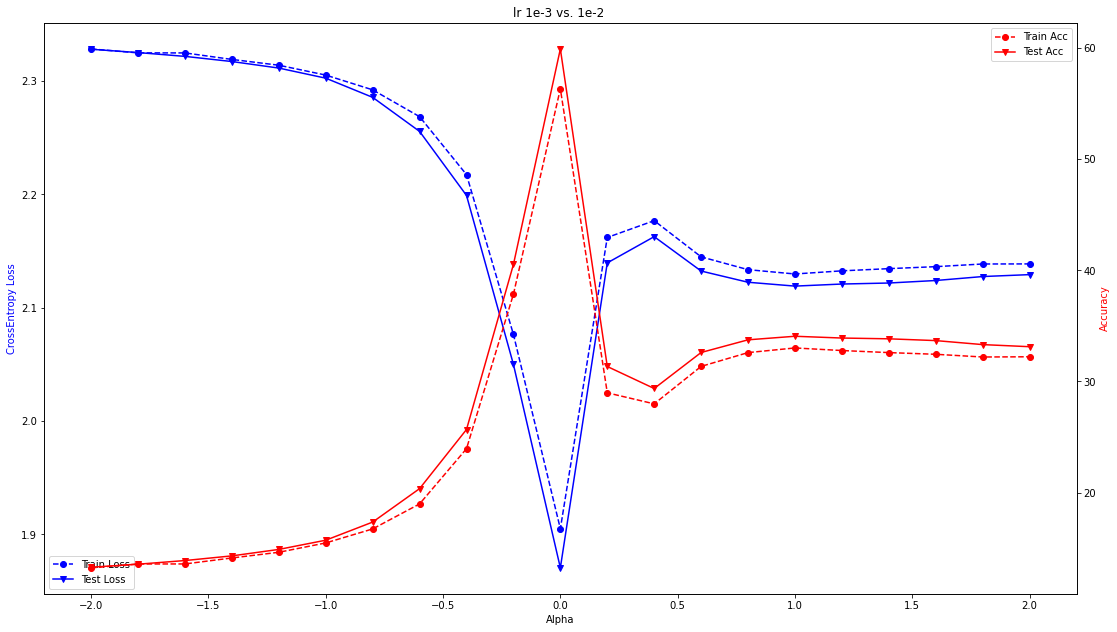

In [16]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(alpha,train_loss_alpha.values(),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,test_loss_alpha.values(),color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="lower left")
ax.set_xlabel("Alpha",color="Black")
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("lr 1e-3 vs. 1e-2 ",color = "Black")


ax2=ax.twinx()
ax2.plot(alpha,[i *100 for i in train_acc_alpha.values()],color="red",linestyle='dashed', marker="o")
ax2.plot(alpha,[i * 100 for i in test_acc_alpha.values()],color="red", marker="v")
ax2.set_xlabel("Alpha",color="Black")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Acc','Test Acc'],loc="upper right")

plt.show()
fig.savefig(result_folder+'HW3_2_lrs_2_rates.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

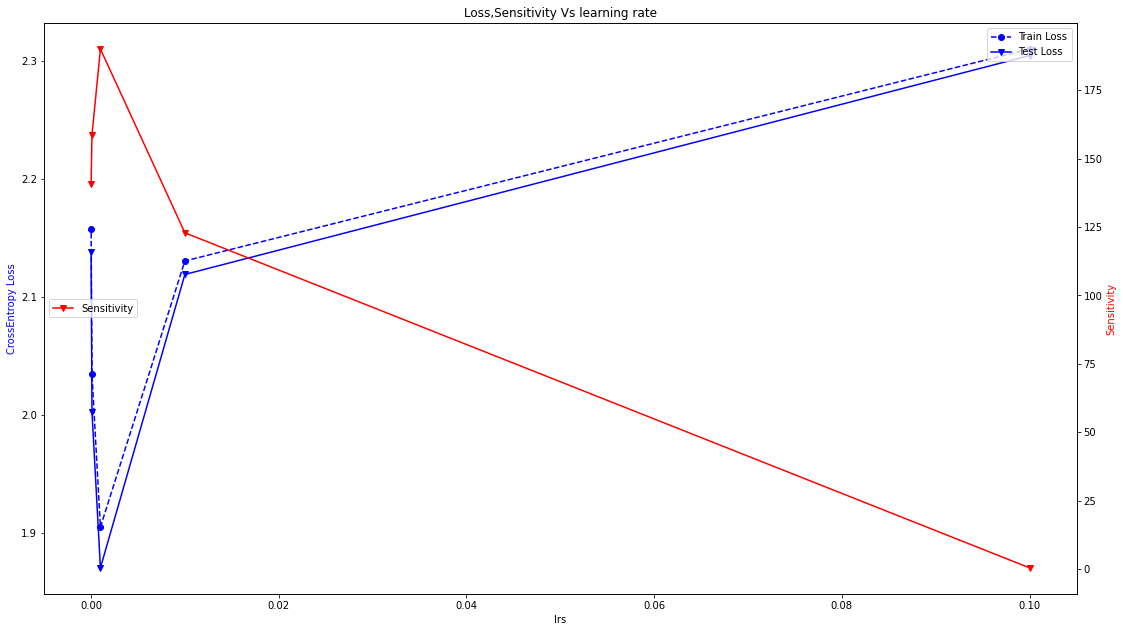

In [25]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.plot(lrs,best_model_train_loss,color="Blue", marker="o",linestyle='dashed')
ax.plot(lrs,best_model_test_loss,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="upper right")
ax.set_xlabel("lrs",color="Black")
# ax.set_xscale('log')
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("Loss,Sensitivity Vs learning rate",color="black")

ax2=ax.twinx()
ax2.plot(lrs,[i * 1000 for i in best_model_sensitivity],color="red",marker="v")
ax2.set_xlabel("lrs",color="Black")
ax2.set_ylabel("Sensitivity",color = "red")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(result_folder+'HW3_2_lrs_all_loss.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

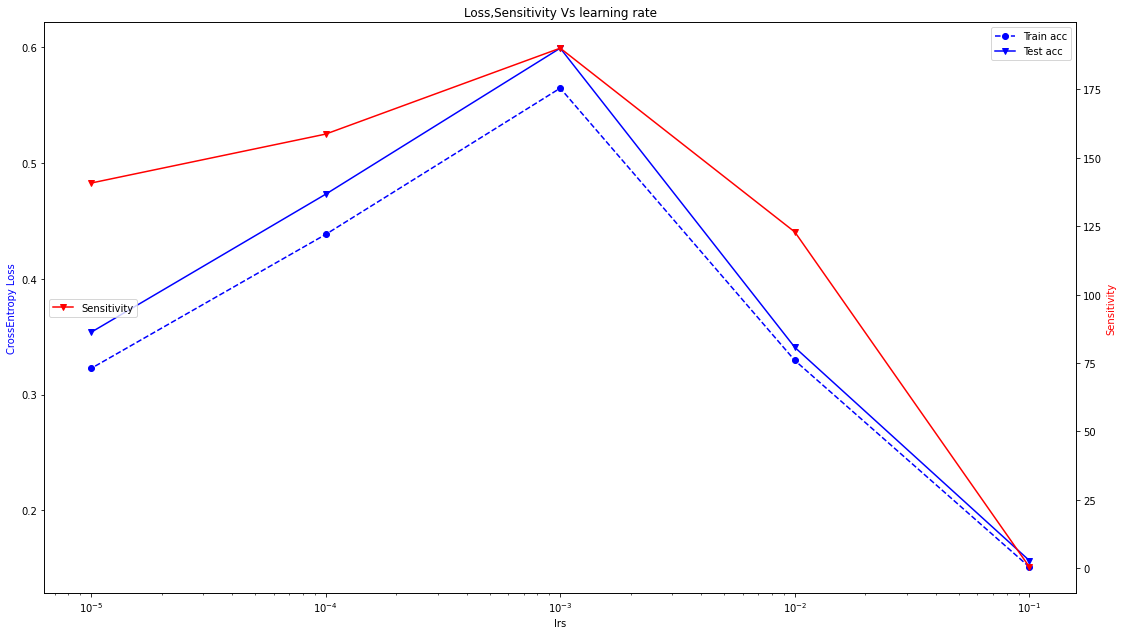

In [23]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(lrs,best_model_train_acc,color="Blue", marker="o",linestyle='dashed')
ax.plot(lrs,best_model_test_acc,color="Blue", marker="v")
ax.legend(['Train acc','Test acc'],loc="upper right")
ax.set_xlabel("lrs",color="Black")
ax.set_xscale('log')
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("Loss,Sensitivity Vs learning rate",color="black")

ax2=ax.twinx()
ax2.plot(lrs,[i *1000 for i in best_model_sensitivity],color="red",marker="v")
ax2.set_xlabel("lrs",color="Black")
ax2.set_ylabel("Sensitivity",color = "red")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(result_folder+'HW3_2_lrs_all_acc.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')